In [1]:
import math
import numpy as np
import pandas as pd
from numba import njit
from numba import jit
!python -m pip install yfinance
import yfinance as yf
import time
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
plot_width = 15
plot_length = 3
lookback = 5


In [3]:
extract_obj = yf.Ticker("TATAMOTORS.NS")
data = extract_obj.history(period="1y")
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close']) / 3).round(2)
data = data.iloc[-50:]
price_list = np.array(data['Typical Price'])

In [7]:
def scaling(input_array, lookback,upper_limit = 100, lower_limit = -100):
    a = np.amin(input_array)
    b = np.amax(input_array)
    b_dash = upper_limit
    a_dash = lower_limit
    scaled_array = np.array([])
    for i in input_array:
        frac = (i - a)/(b - a)
        val1 = frac*(b_dash - a_dash)
        scaled_val = val1 + a_dash
        scaled_array = np.append(scaled_array, scaled_val)
    return scaled_array

In [8]:
start = time.time()
x1 = scaling(price_list,lookback)
end = time.time()
print(x1.size)


50


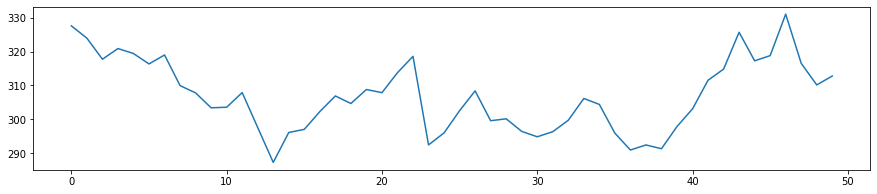

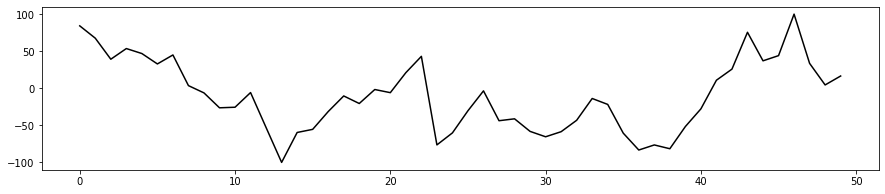

In [9]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(plot_width, plot_length))
ax1 = plt.subplot()
plt.plot(np.arange(price_list.size), price_list)

figure(figsize=(plot_width, plot_length))
ax2 = plt.subplot()
plt.plot(np.arange(x1.size), x1, color = 'black')
plt.show()